# Employee Turnover Prediction

Problem statement: 

The goal is to find out the employees who stay and leave the company in the upcoming year.Based on the given features,we performed Exploratory Data Analysis, Descriptive Statistical Analysis, Outlier analysis, Feature Engineering, and Feature Selection and made the change as per requirements.Created Data visualizations using Seaborn and Matplotlib libraries to find the insight patterns.Used Machine Learning algorithms to build predictive models to find out the best accuracy.

# Project Task 2: Feature Engineering

Task Explanation :

● Look for missing values and duplicate values and find a way to clean it.

● Perform outlier analysis on numerical features. Use any method to get rid of outliers.

● Evaluate the target variable, find patterns and insights from data using visualizations.

● Nature of employees who stay, nature of employees who leave.


# Importing Libraries

In [1]:
#for Manipulations
import pandas as pd
import numpy as np

#for Data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for Scientific computations
from scipy import stats
from sklearn.preprocessing import LabelEncoder

#To Ignore warnings
import warnings
warnings.filterwarnings("ignore")


# Reading the Dataset

In [2]:
import os

In [3]:
emp = pd.read_csv('employee.csv')

In [4]:
emp.head()

,EmployeId,Age,Gender,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,M,Divorced,No,Sometimes,Research & Development,1,Medical,3,...,4,80,1,2,3,3,2,2,2,2
1,723,23,M,Single,No,Mostly,Sales,1,Life Sciences,2,...,4,80,0,3,3,1,0,0,0,6
2,1297,36,M,Single,Yes,Sometimes,Human Resources,4,Life Sciences,2,...,3,80,0,3,4,7,7,0,0,10
3,51,30,M,Divorced,No,Sometimes,Research & Development,4,Medical,3,...,2,80,3,5,3,10,6,3,9,12
4,1498,29,M,Single,Yes,Sometimes,Sales,3,Technical Degree,4,...,1,80,0,2,3,3,2,2,2,24


In [5]:
#Checking the columns
emp.columns

Index(['EmployeId', 'Age', 'Gender', 'MaritalStatus', 'Turnover', 'Travelling',
       'Vertical', 'Qualifications', 'EducationField', 'EmployeSatisfaction',
       'JobEngagement', 'JobLevel', 'JobSatisfaction', 'Role', 'DailyBilling',
       'HourBilling', 'MonthlyBilling', 'MonthlyRate', 'Work Experience',
       'OverTime', 'PercentSalaryHike', 'Last Rating',
       'RelationshipSatisfaction', 'Hours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'Work&Life', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager', 'DistanceFromHome'],
      dtype='object')

In [6]:
#Checking the shape of the dataset
emp.shape

(1470, 32)

# Look for missing values and duplicate values¶

In [7]:
#Checking Missing Values
emp.isnull().sum()

EmployeId                   0
Age                         0
Gender                      0
MaritalStatus               0
Turnover                    0
Travelling                  0
Vertical                    0
Qualifications              0
EducationField              0
EmployeSatisfaction         0
JobEngagement               0
JobLevel                    0
JobSatisfaction             0
Role                        0
DailyBilling                0
HourBilling                 0
MonthlyBilling              0
MonthlyRate                 0
Work Experience             0
OverTime                    0
PercentSalaryHike           0
Last Rating                 0
RelationshipSatisfaction    0
Hours                       0
StockOptionLevel            0
TrainingTimesLastYear       0
Work&Life                   0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrentManager     0
DistanceFromHome            0
dtype: int64

In [8]:
#Checking Duplicates
emp.duplicated().sum()

0

In [9]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeId                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   MaritalStatus             1470 non-null   object
 4   Turnover                  1470 non-null   object
 5   Travelling                1470 non-null   object
 6   Vertical                  1470 non-null   object
 7   Qualifications            1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeSatisfaction       1470 non-null   int64 
 10  JobEngagement             1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobSatisfaction           1470 non-null   int64 
 13  Role                      1470 non-null   object
 14  DailyBilling            

# Perform Outlier analysis on numerical features, so necessary features are converted into numerical features by using label encoder

In [10]:
emp.head()

,EmployeId,Age,Gender,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,M,Divorced,No,Sometimes,Research & Development,1,Medical,3,...,4,80,1,2,3,3,2,2,2,2
1,723,23,M,Single,No,Mostly,Sales,1,Life Sciences,2,...,4,80,0,3,3,1,0,0,0,6
2,1297,36,M,Single,Yes,Sometimes,Human Resources,4,Life Sciences,2,...,3,80,0,3,4,7,7,0,0,10
3,51,30,M,Divorced,No,Sometimes,Research & Development,4,Medical,3,...,2,80,3,5,3,10,6,3,9,12
4,1498,29,M,Single,Yes,Sometimes,Sales,3,Technical Degree,4,...,1,80,0,2,3,3,2,2,2,24


In [11]:
le = LabelEncoder()
print(le)

LabelEncoder()


In [12]:
#Necessary features are converted into numerical features
emp['YearsAtCompany'] = le.fit_transform(emp['YearsAtCompany'])
emp['Gender'] = le.fit_transform(emp['Gender'])
emp['MaritalStatus'] = le.fit_transform(emp['MaritalStatus'])
emp['Turnover'] = le.fit_transform(emp['Turnover'])
emp['Travelling'] = le.fit_transform(emp['Travelling'])

In [13]:
#To check the dataset after converting to numerical features
emp.head()

,EmployeId,Age,Gender,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,1,0,0,2,Research & Development,1,Medical,3,...,4,80,1,2,3,3,2,2,2,2
1,723,23,1,2,0,0,Sales,1,Life Sciences,2,...,4,80,0,3,3,1,0,0,0,6
2,1297,36,1,2,1,2,Human Resources,4,Life Sciences,2,...,3,80,0,3,4,7,7,0,0,10
3,51,30,1,0,0,2,Research & Development,4,Medical,3,...,2,80,3,5,3,10,6,3,9,12
4,1498,29,1,2,1,2,Sales,3,Technical Degree,4,...,1,80,0,2,3,3,2,2,2,24


In [14]:
emp['Age'].describe()

count    1470.000000
mean       37.065306
std         9.522562
min        18.000000
25%        30.000000
50%        36.000000
75%        44.000000
max        59.000000
Name: Age, dtype: float64

In [18]:
q1=30
q3=44

In [19]:
iqr=stats.iqr(emp['Age'])
iqr

14.0

In [21]:
#To find the lower and upper limit values 
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

lower_limit 9.0
upper_limit 65.0


In [22]:
emp['YearsAtCompany'].describe()

count    1470.000000
mean        6.763265
std         5.741043
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        32.000000
Name: YearsAtCompany, dtype: float64

In [ ]:
q1=3
q3=9

In [23]:
iqr=stats.iqr(emp['YearsAtCompany'])
iqr

6.0

In [24]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

lower_limit 21.0
upper_limit 53.0


In [25]:
emp['DistanceFromHome'].describe()

count    1470.000000
mean        9.278231
std         8.157120
min         1.000000
25%         2.000000
50%         7.000000
75%        15.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [ ]:
q1=2
q3=15

In [26]:
iqr=stats.iqr(emp['DistanceFromHome'])
iqr

13.0

In [27]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

lower_limit 10.5
upper_limit 63.5


# Evaluate the target variable, find patterns and insights from data using visualizations 

<AxesSubplot:xlabel='Age', ylabel='Turnover'>

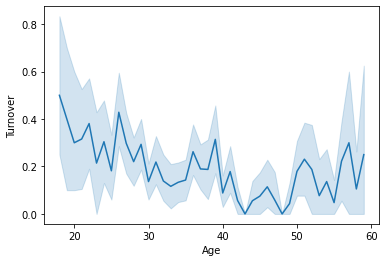

In [28]:
sns.lineplot( emp['Age'], emp['Turnover'])

<AxesSubplot:xlabel='OverTime', ylabel='Turnover'>

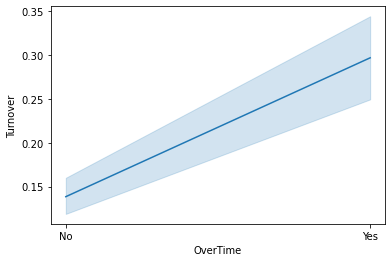

In [29]:
sns.lineplot( emp['OverTime'], emp['Turnover'])

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Turnover'>

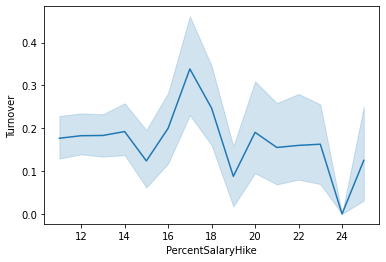

In [30]:
sns.lineplot( emp['PercentSalaryHike'], emp['Turnover'])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Turnover'>

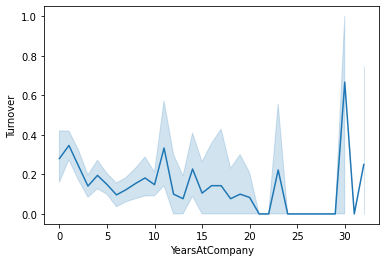

In [31]:
sns.lineplot( emp['YearsAtCompany'], emp['Turnover'])

# Conclusion

#Nature of employees who stay, nature of employees who leave.

#Employees in age group of 40 and 50 are most likely to opt for a turnover.

#Turnover rate increases as overtime increases.

#Maximum turnover rate is seen where salary hike is from 16% to 18% and minimum turnover is seen where salary hike is at 24%.

#Employees who have completed 30 to 33 years at company are most likely to opt for a turnover and those who spent 24 to 30 
 years are not likely to opt for a turnover.